In [1]:
using Reactive, Interact

In [2]:
using PyPlot

In [3]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [4]:
import BP

In [5]:
#reload("BP")

In [ ]:
#g = gcd(sp,sq)
#p = div(sp,g)
#q = div(sq,g)

In [6]:
δpmp(n₀::Int,m₀::Int) = BP.δpmp(45; n0=n₀, m0=m₀)
gausspmp(n₀::Int,m₀::Int) = BP.gausspmp(45; σ=1., n0=n₀, m0=m₀)
homopmp() = BP.homopmp(N)
randpmp(s::Uint) = BP.randpmp(N; seed=s) #1234

gausspmp (generic function with 1 method)

In [7]:
const ν = linspace(-3.45,-2.47,981);
const P = gausspmp(5,5);
@time sp = BP.Spectrum(ν,P, :landau, 1/11,0.001,0.02);

elapsed time: 29.135320724 seconds (3131181092 bytes allocated, 9.12% gc time)


In [8]:
#full plot range, both in x and y
const xm = [-div(sp.N-1,2):div(sp.N-1,2)]

#zoom in :)
const edge = 10
const st = findin(xm, -edge)[1]
const en = findin(xm, edge)[1];

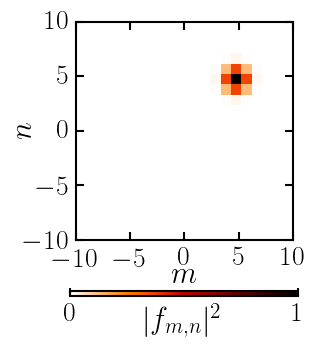

In [9]:
f, ax = plt.subplots(figsize=(3.5, 3.5))
im = ax[:imshow](reshape(abs2(P), sp.N,sp.N)[st:en,st:en], origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-edge, edge, -edge, edge],
                 vmin=0, vmax=1)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.08, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 1])
cbar[:set_ticklabels]([L"$0$", L"$1$"])
cbar[:set_label](L"$|f_{m,n}|^2$", rotation=0, labelpad=-15, y=0.5)
cbar[:solids][:set_edgecolor]("face")

In [10]:
sω = slider(ν[1]:0.002:ν[end], label="ω")

Slider{Float64}([Input{Float64}] -2.96,"ω",-2.96,-3.45:0.002:-2.47)

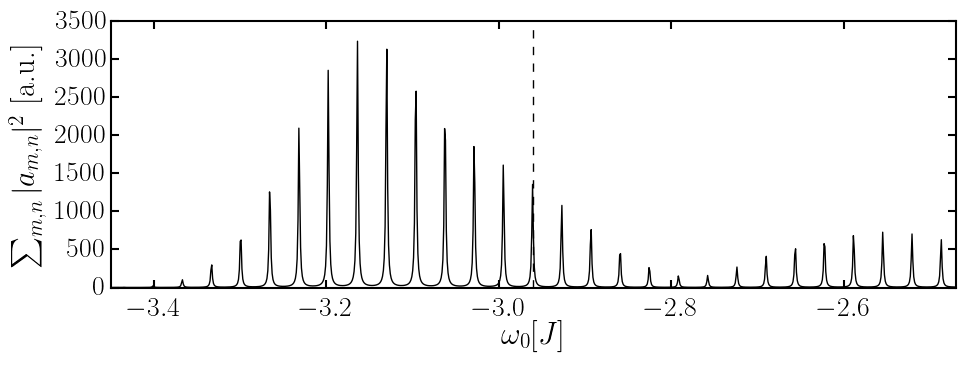

In [11]:
#plot spectrum
f1, ax1 = plt.subplots(figsize=(10, 4))
lift(ω -> withfig(()->begin
    ax1[:cla]()
    ax1[:plot](sp.νs,sp.intensity,"k") 
    ax1[:axvline](x=ω,color="k",ls="dashed")
    ax1[:set_xlim](sp.νs[1],sp.νs[end])
    ax1[:set_xlabel](L"$\omega_0 [J]$")
    ax1[:set_ylabel](L"$\sum_{m,n} |a_{m,n}|^2$ [a.u.]")
    end,f1,clear=false), sω)

In [12]:
display(sω)

Slider{Float64}([Input{Float64}] -2.96,"ω",-2.96,-3.45:0.002:-2.47)

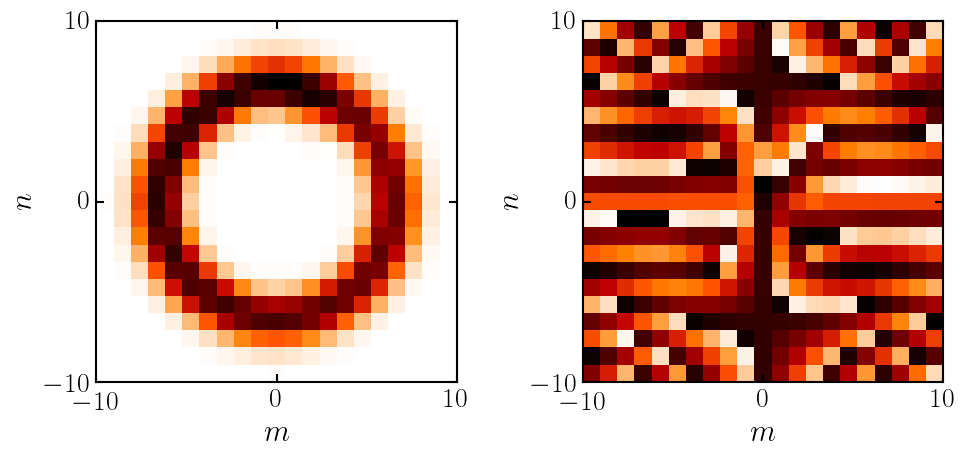

In [13]:
#plot w.f. in real space
f2, axes = plt.subplots(1,2, figsize=(10, 5))
lift(ω -> withfig(()->begin
    axes[1][:cla]()
    axes[2][:cla]()
    axes[1][:imshow](abs2(reshape(BP.getstate(sp, ω), sp.N,sp.N))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    axes[2][:imshow](angle(reshape(BP.getstate(sp, ω), sp.N,sp.N))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    for ax in axes
        ax[:set_xlabel](L"$m$")
        ax[:set_ylabel](L"$n$")
        ax[:set_xticks]([-10,0, 10])
        ax[:set_yticks]([-10,0, 10])
    end
    end,f2,clear=false), sω)

In [14]:
display(sω)

Slider{Float64}([Input{Float64}] -2.96,"ω",-2.96,-3.45:0.002:-2.47)

In [15]:
k = linspace(-π, π, 50);

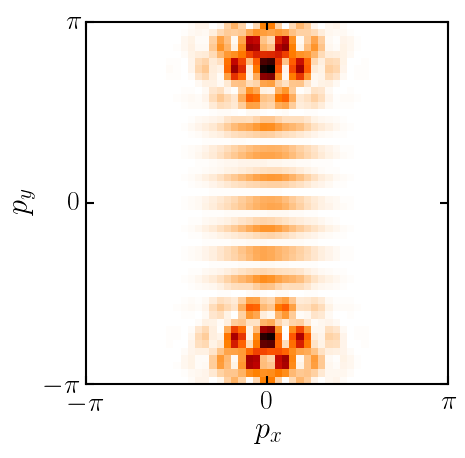

In [16]:
#plot w.f. in mom space
f3, ax3 = plt.subplots(figsize=(5, 5))
lift(ω -> withfig(()->begin
    ax3[:cla]()
    ax3[:imshow](abs2(BP.myfft2(reshape(BP.getstate(sp, ω), sp.N,sp.N), k,k)),
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-π, π, -π, π])
    ax3[:set_xticks]([-π,0,π])
    ax3[:set_yticks]([-π,0,π])
    ax3[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
    ax3[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
    ax3[:set_xlabel](L"$p_x$")
    ax3[:set_ylabel](L"$p_y$")
    end,f3,clear=false), sω)

In [17]:
## function extractpath(l1::Int,l2::Int,c1::Int,c2::Int, M::Matrix{Float64})
##     path=Float64[]
##     append!(path, M[l1:l2,c1])
##     append!(path, vec(M[l2,c1:c2])[2:end])
##     append!(path, M[l2:-1:l1,c2][2:end])
##     append!(path, vec(M[l1,c2:-1:c1])[2:end-1])
##     path
## end